In [39]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, X, y, w=None, b=None):
        """
        Initialize the LinearRegression model.
        :param X: Input features (1D array-like)
        :param y: Target values (1D array-like)
        :param w: Initial weight (slope), defaults to 0.0
        :param b: Initial bias (intercept), defaults to 0.0
        """
        self.X = np.array(X)
        self.y = np.array(y)
        self.w = w if w is not None else 0.0  # Model slope
        self.b = b if b is not None else 0.0  # Model intercept

    def compute_cost(self, X, y, w, b):
        """
        Compute the Mean Squared Error (MSE) cost function.

        Two implementations:
        (1) For-loop (commented for reference)
        (2) Vectorized (active)
        :param X: Input features (1D array)
        :param y: Target values (1D array)
        :param w: Current weight (slope)
        :param b: Current bias (intercept)
        :return: MSE cost (float)
        """
        m = X.shape[0]  # Number of training examples

        # ----- For-loop version (commented)
        # cost_sum = 0
        # for i in range(m):
        #     y_pred = w * X[i] + b       # Predict for each sample
        #     cost_sum += (y_pred - y[i]) ** 2  # Squared error
        # cost = (1 / (2 * m)) * cost_sum

        # ----- Vectorized version (active)
        y_pred = w * X + b                        # Predict all at once
        errors = y_pred - y                       # Vectorized errors
        cost = (1 / (2 * m)) * np.sum(errors ** 2)  # MSE cost

        return cost

    def compute_gradient(self, X, y, w, b):
        """
        Compute gradients for weight (w) and bias (b).

        Two implementations:
        (1) For-loop (commented for reference)
        (2) Vectorized (active)
        :param X: Input features (1D array)
        :param y: Target values (1D array)
        :param w: Current weight
        :param b: Current bias
        :return: Tuple of gradients (dj_dw, dj_db)
        """
        m = X.shape[0]  # Number of training examples

        # ----- For-loop version (commented)
        # dj_dw = 0
        # dj_db = 0
        # for i in range(m):
        #     y_pred = w * X[i] + b
        #     dj_dw += (y_pred - y[i]) * X[i]  # Partial derivative w.r.t w
        #     dj_db += (y_pred - y[i])         # Partial derivative w.r.t b
        # dj_dw /= m
        # dj_db /= m

        # ----- Vectorized version (active)
        y_pred = w * X + b
        errors = y_pred - y
        dj_dw = (1 / m) * np.dot(errors, X)  # Partial derivative w.r.t w (slope)
        dj_db = (1 / m) * np.sum(errors)     # Partial derivative w.r.t b (intercept)

        return dj_dw, dj_db

    def fit(self, alpha=0.01, num_iters=1000, tolerance=1e-6):
        """
        Train the model using gradient descent with optional early stopping.
        :param alpha: Learning rate (step size for updates)
        :param num_iters: Maximum number of iterations
        :param tolerance: Stop if cost change < tolerance (early stopping)
        :return: List of cost values for each iteration
        """
        cost_history = []
        prev_cost = float('inf')  # Initialize with a very large value

        for i in range(num_iters):
            # Compute gradients for current parameters
            dj_dw, dj_db = self.compute_gradient(self.X, self.y, self.w, self.b)

            # Update parameters using gradient descent
            self.w -= alpha * dj_dw
            self.b -= alpha * dj_db

            # Compute current cost and store it
            cost = self.compute_cost(self.X, self.y, self.w, self.b)
            cost_history.append(cost)

            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Cost={cost:.6f}, w={self.w:.4f}, b={self.b:.4f}")

            # Check for early stopping
            if abs(prev_cost - cost) < tolerance:
                print(f"Early stopping at iteration {i}: Cost change={abs(prev_cost - cost):.8f}")
                break

            prev_cost = cost  # Update previous cost

        return cost_history

    def predict(self, X):
        """
        Predict target values for given input features.
        :param X: Input features (scalar or 1D array)
        :return: Predicted target values (scalar or array)
        """
        X = np.array(X)
        y_pred = self.w * X + self.b
        return y_pred

    def plot_cost(self, cost_history):
        """
        Plot the cost history to visualize convergence during training.
        :param cost_history: List of cost values returned by fit()
        """
        plt.figure(figsize=(8, 5))
        plt.plot(cost_history, color='blue', linewidth=2)
        plt.title('Cost Function Convergence')
        plt.xlabel('Iterations')
        plt.ylabel('Cost (MSE)')
        plt.grid(True)
        plt.show()


## Example Usage


Iteration 0: Cost=17.107600, w=0.2200, b=0.0600
Iteration 100: Cost=0.017117, w=1.8799, b=0.4337
Iteration 200: Cost=0.012203, w=1.8986, b=0.3662
Iteration 300: Cost=0.008700, w=1.9144, b=0.3092
Iteration 400: Cost=0.006202, w=1.9277, b=0.2611
Iteration 500: Cost=0.004422, w=1.9389, b=0.2204
Iteration 600: Cost=0.003152, w=1.9484, b=0.1861
Iteration 700: Cost=0.002247, w=1.9565, b=0.1571
Iteration 800: Cost=0.001602, w=1.9632, b=0.1327
Iteration 900: Cost=0.001142, w=1.9690, b=0.1120


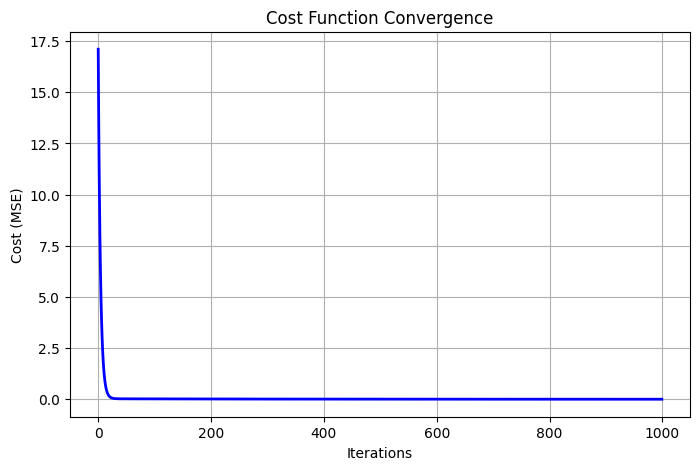

Predicted value for x=6: 11.937282487682731


In [40]:
# Example dataset
X = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create and train the model
model = LinearRegression(X, y)
cost_history = model.fit(alpha=0.01, num_iters=1000)

# Plot cost history
model.plot_cost(cost_history)

# Make a prediction
print("Predicted value for x=6:", model.predict(6))
